In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

# Домашнее задание: классификация


## Задание 1.

Для примера с XOR с помощью кривых обучения  оцените какое количество данных достаточно для обучения  логистической регресси и  SVM  c разными ядрами (сделайте )



In [ ]:
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [ ]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none', facecolor=lines[0].get_color(), alpha=0.2)

Логистическая регрессия


In [ ]:
#кривая обучения
train_sizes = np.linspace(0.01, 1, 20)
train_n, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
#валидационная
Cs = np.logspace(-2, 1, 20)
train_scores2, valid_scores2 = validation_curve(LogisticRegression(), X, y, param_name='C', param_range=Cs, cv=5, scoring='accuracy')

График какой-то нерепрезентативный. У нас падает скор с ростом данных, получается, чем меньше данных, тем лучше. Но кривые ещё не сошлись, может быть можно добавлять ещё данные.

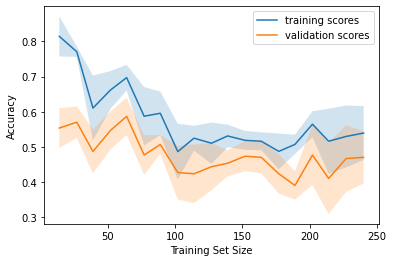

In [ ]:
#обучение
plot_with_err(train_n, train_scores, label='training scores')
plot_with_err(train_n, valid_scores, label='validation scores')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

SVM

In [ ]:
#кривая обучения
train_sizes = np.linspace(0.01, 1, 20)
train_n, train_scores, valid_scores = learning_curve(svm.SVC(), X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
#валидационная
Cs = np.logspace(-2, 1, 20)
train_scores2, valid_scores2 = validation_curve(svm.SVC(), X, y, param_name='C', param_range=Cs, cv=5, scoring='accuracy')

Тоже не самый репрезентативный график. Скоры растут, но кривые почти сошлись. Наверное, нужно менять сложность модели.

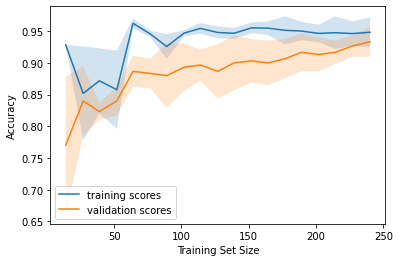

In [ ]:
#обучение
plot_with_err(train_n, train_scores, label='training scores')
plot_with_err(train_n, valid_scores, label='validation scores')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()


## Задание 2.

Для примера с чипами подберите оптимальные параметры для SVM классификатора с разными ядрами, постройте кривые обучения и валидационные кривые, сделайте выводы

In [ ]:
df_chip = pd.read_csv('https://raw.githubusercontent.com/iknyazeva/ML2020/master/assignments/datasets/microchip_tests.txt', header=None, names = ('test1','test2','released'))

In [ ]:
X = df_chip.iloc[:,:2].values
y = df_chip.iloc[:,2].values

С помощью GridSearchCV найдём лучшие параметры для модели. Вышло так, что лучшее ядро - poly.

In [ ]:
svm_param = {'C': np.logspace(0.01, 1, 10), 'gamma': np.linspace(0.1, 1, num=5), 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'degree': np.linspace(1, 10, num=5)}  
svm_valid = GridSearchCV(svm.SVC(), svm_param, scoring='accuracy', cv=5)
svm_valid.fit(X, y)

In [ ]:
res_svm = pd.DataFrame(svm_valid.cv_results_).loc[:,['params','mean_test_score','std_test_score','rank_test_score']]
print(svm_valid.best_params_)
print(svm_valid.best_score_)
a = res_svm.sort_values('rank_test_score')
a.iloc[:10]

{'C': 4.677351412871983, 'degree': 10.0, 'gamma': 1.0, 'kernel': 'poly'}
0.7206521739130436


,params,mean_test_score,std_test_score,rank_test_score
798,"{'C': 6.025595860743578, 'degree': 10.0, 'gamm...",0.720652,0.062822,1
898,"{'C': 7.762471166286917, 'degree': 10.0, 'gamm...",0.720652,0.073045,1
698,"{'C': 4.677351412871983, 'degree': 10.0, 'gamm...",0.720652,0.062822,1
532,"{'C': 3.630780547701014, 'degree': 3.25, 'gamm...",0.705797,0.149417,4
572,"{'C': 3.630780547701014, 'degree': 7.75, 'gamm...",0.705797,0.149417,4
708,"{'C': 6.025595860743578, 'degree': 1.0, 'gamma...",0.705797,0.149417,4
552,"{'C': 3.630780547701014, 'degree': 5.5, 'gamma...",0.705797,0.149417,4
748,"{'C': 6.025595860743578, 'degree': 5.5, 'gamma...",0.705797,0.149417,4
512,"{'C': 3.630780547701014, 'degree': 1.0, 'gamma...",0.705797,0.149417,4
768,"{'C': 6.025595860743578, 'degree': 7.75, 'gamm...",0.705797,0.149417,4


In [ ]:
#кривая обучения
train_sizes = np.linspace(0.01, 1, 20)
train_n, train_scores, valid_scores = learning_curve(svm.SVC(), X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
#валидационная
Cs = np.logspace(-6, -1, 5)
train_scores2, valid_scores2 = validation_curve(svm.SVC(), X, y, param_name='C', param_range=Cs, cv=5, scoring='accuracy')

Кривые пока не сходятся, можно улучшить результат, увеличив количество наблюдений.

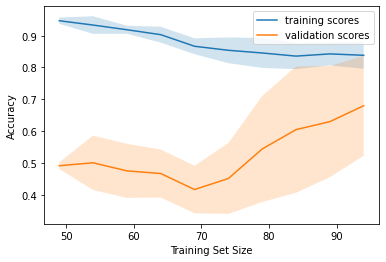

In [ ]:
#обучение
plot_with_err(train_n, train_scores, label='training scores')
plot_with_err(train_n, valid_scores, label='validation scores')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

Модель переобучается - кривые (*прямые*) расходятся при увеличении сложности модели.

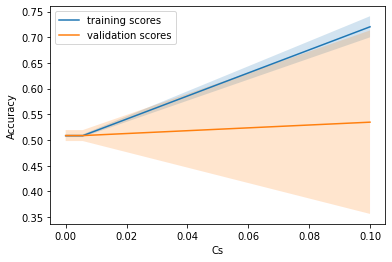

In [ ]:
#валидация
plot_with_err(Cs, train_scores2, label='training scores')
plot_with_err(Cs, valid_scores2, label='validation scores')
plt.xlabel('Cs') 
plt.ylabel('Accuracy')
plt.legend()